# (0) Usage Instructions
Before using the algorithm on your computer, there are some libraries you must install. Provided that you have the **latest** version of **python**, copy and paste these commands into the console.

1. pip install tensorflow
2. pip install numpy
3. pip install tkinter
4. pip install pillow

After installing the above-mentioned libraries you are good to go!!!

# (1) Introduction
One thing this pandemic has thought me was how reliant humanity is on technology from ordering products to assisting people in their professions. Due to the lack of hospital facilities around the world, I firmly believe that it is high time that we enhance our equipment to satisfy the mass amount of patients overflowing the hospitals every day. It is during times like these we realise that despite how advanced we become we are never prepared. Hence I am introducing my latest project in the advancement of **computer vision**, one that not only detects values to the highest precision but also generates results in the quickest. This isn't a solution to replacing doctors or the field of radiology, this algorithm is quite useless **for real purposes** * this algorithm just about shows how accurate I can derive the results for lungs with and without Pneumonia. That's right, this project is targeted in finding Pneumonia -like symptoms in the X-ray of the lungs and what it generates a value either 1 or 0 with **1 being has pneumonia** and **0 being doesn't have Pneumonia**. Okay now that we are clear that what this is intended for, let's look at the dataset shall we?


---

## (1)(a) The Dataset
As usual, the dataset is split into the training and the test set, but instead of being in an excel sheet, as all the data is images, the dataset is in a folder here is the architecture

|   File Path    | Description |
| ----------- | ----------- |
| train\NORMAL      | 1,342 images containing X-rays of normal lungs for training     |
| train\PNEUMONIA   | 3,876 images containing X-rays of lungs with pneumonia for training        |
| test\NORMAL      | 234  images containing X-rays of normal lungs for validation     |
| test\PNEUMONIA   | 390 images containing X-rays of lungs with pneumonia for validation       |


---
Before we enter the training let's explain some concepts based on convolutional neural networks and eventually the YOLO algorithm.


# Importing the libraries
The following code cell shows all the libraries I have imported to execute this procedure.

| Library      | Description |
| ----------- | ----------- |
| NumPy     | Used to work with arrays       |
|   TensorFlow | Used to build the deep neural network model        |
| Keras     | Used to pre-process the image for it to be fed into the neural network       |
| Time     | Used to calculate the time taken to train       |

In [ ]:
import numpy as np
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
import time

# Data Preprocessing
Before the image can be fed into the neural network, it must be processed in a way that is **compatible** with the Convolutional layer of the network. This is done in the below following steps.

## Preparing the Training-Set
The training set is **augmented** in the below code cell. What does that mean?? Basically images are augmented to avoid **overfitting** i.e, preventing the training of the model to be super reliant on the training images. This is dangerous as when a new image is introduced, and the new test image is slightly tilted or zoomed, the model will have a hard time picking up the features as the model is used to the **"perfect images"** in the training set. The types of augmentation we will be using are as follows:-

* Zoom
* [Shear-Range](https://stackoverflow.com/questions/57301330/what-exactly-the-shear-do-in-imagedatagenerator-of-keras)
* Horizontal Flip

***NOTE***:- rescale is used to normalize the pixel images between a value ranging from (0 - 1). This is just to ensure that the values are set at a standard.



In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

## Fitting the images to the Training generator
The below line of code converts the images into a format, augments it and, eventually prepares the images. The parameters will be varied in **part 3** where I tweak the parameters to get a faster training time and a more accurate model.

In [ ]:
training_set = train_datagen.flow_from_directory(
    r'chest_xray/train',
    target_size = (416, 416),
    batch_size = 32,
    class_mode = 'binary'
    )

## Preparing the Test Set

In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

## Fitting the images to the Testing generator

In [ ]:
test_set = test_datagen.flow_from_directory(
    r'chest_xray/test',
    target_size = (416, 416),
    batch_size = 32,
    class_mode = 'binary'
    )

# (2) Convolutional Neural Networks (An Intuition)
The Convolutional Neural Network or CNN for short is an algorithm that is used in the image processing side of machine learning. This algorithm is basically an Artificial Neural Network that has **extra layers on top of it** that helps **process the images** in order for it to be compatible for the fully connected layer. You can click [here](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) if you are unfamiliar with Artificial Neural Networks which will guide you to the notebook I have written about ANNs. Anyways now that we have a general idea, let's look into CNNs in more detail. The below line initializes the CNN architecture into which we will add the layers.

In [ ]:
cnn = tf.keras.models.Sequential()

## (2)(a) The Convolution Layer
This is the first layer the image goes through. This layer scans the image for some certain features using a feature-detector which is usually termed as a <ins>**filter**</ins> and using those filters it scans for certain features from the images that differentiate it from others. In the example of detecting pneumonia in the lungs, this model will scan the entire image and would try to separate any similarity between those images i.e what **features** do these images have in common. Using that knowledge, it can generate these filters. After this layer, the filters are sent to the pooling layer. Below is an image of the convolution layer and how it works.



---


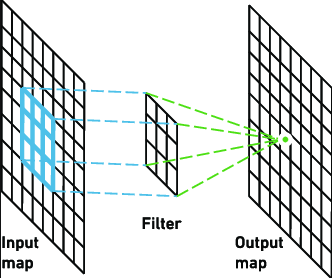

The below line of code represents the first convolutional layer. The underlined words in the above explanation cell represent the parameters that we will be using in the code. Below is the table of the parameters and their explanation.

| Parameter      | Description |
| ----------- | ----------- |
| filters      | The number of filters       |
| kernel_size   | The 2*2 tuple that represents the size of the filter        |
| strides      | (**Not Mentioned** ) The number of pixels the filter slides through the images     |
| [activation](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb)      | The activation function applied      |
| input_shape      | The size of the input filters (length, height, RGB)       |

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(416, 416, 3)))

## (2)(b) The Pooling Layer
This layer is used to further extract the features from the feature detector by separating the features of the image from the background. The concept of ignoring the background noise is known as **Spatial Invariance**. This is a useful step as it not only **reduces computational time** but also improves the accuracy of the model. This layer is usually followed up with another Convolutional layer. There are different types of poolings but the ones we will be using is known as [***Max-Pooling***](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling#:~:text=Max%20pooling%20is%20a%20sample,in%20the%20sub%2Dregions%20binned.). This is the process in which the maximum value of the pixel within a defined window size, specified by the developer, is used in building another "filter-like" structure. There are many other pooling methods such as taking the **average, summation of, median** etc. Below is a pictographic representation of the pooling process.


---

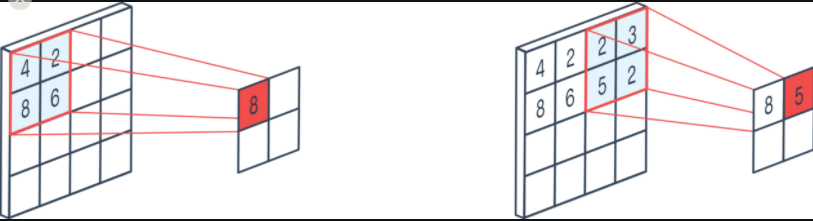

The below line of code represents the first Max-Pooling layer. Below is the table of the parameters and their explanation.
The below line of code represents the first Max-Pooling layer. The underlined words in the above explanation cell represent the parameters that we will be using in the code. Below is the table of the parameters and their explanation.

| Parameter      | Description |
| ----------- | ----------- |
| pool_size      | The 2*2 tuple that represents the size of the pooling grid that goes over the convoluted image       |
| strides      | (**Not Mentioned** ) The number of pixels thepool_box slides through the images     |
| input_shape      | The size of the input filters (length, height, RGB)       |

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, input_shape=(416, 416, 16)))

## The rest!
(Will Be Explained Later)

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(208, 208, 16)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(208, 208, 32)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(104, 104, 32)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(104, 104, 64)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(52, 52, 64)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(52, 52, 128)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(26, 26, 128)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(26, 26, 256)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 256)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, input_shape=(13, 13, 512)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 512)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 1024)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(13, 13, 1024)))
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(1, 1), strides=1, activation='relu',input_shape=(13, 13, 125)))

## (2)(c) The Flattening Layer
So far, we have been discussing the input values as a sort of like a matrix of values representing pixel densities. However, as reviewed in the [Artificial Neural Network](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) section the **fully connected layer** doesn't accept this format. Instead, it accepts the format of individual nodes, each node acting as a feature. The purpose of a flattening layer is to convert the matrix of features from the pooling or the convolutional layer into a set of input nodes that can be used as input nodes in a fully connected layer. Below is an image describing the process.


---

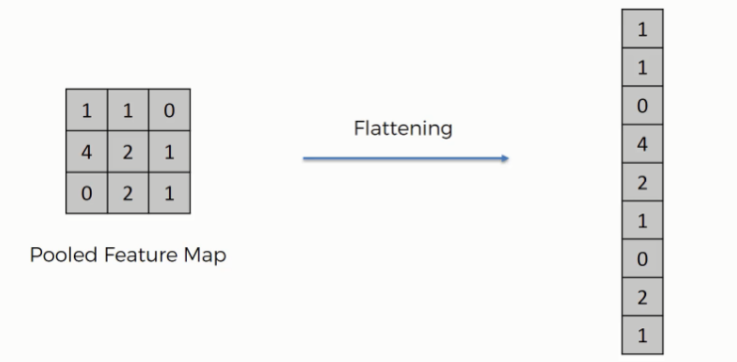

The code below represents the flattening layer.

In [ ]:
cnn.add(tf.keras.layers.Flatten())

## (2)(d) The Fully Connected Layer
I have posted a notebook about this concept. Click the [link](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) to learn more. Here is the fully connected layer is shown below.

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## (2)(e) Compilation

This model is compiled using the **[Stochastic Gradient Descent](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb)** optimizer and the **binary_cross entropy** loss.

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## (2)(f) Fitting The Training & Validation Data Into The Training & Test Set
This line of code is used to start the training. Notice that this line is wrapped by two "time lines" of code. These lines are used to calculate the time taken to train the model.

In [ ]:
tic = time.time()
cnn.fit(x=training_set, validation_data=test_set, epochs=50)
toc = time.time()

# (3) Experimentation
In this section, we will focus on **parameter tuning** i.e changing the parameters in the algorithm to obtain the **highest accuracy**. The base parameters for the algorithm is the one as provided above with **10 Conv Layers**, **6 Max-Pool Layers**, 50 **epochs**, 1 **fully-connected layer** and so on. Let us look at all the cases and choose the best one.

## (3)(a) Base Case
This is the beginning case, sort of like a **calibration** that is used to deduce the metric for the other cases. Below are the **key parameters** to focus on

1. The Fully-Connected layer.
2. The number of epochs.
3. The batch size.

### Below are the code examples depicting this concept
1. ```
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
```
2. ```
cnn.fit(x=training_set, validation_data=test_set, epochs=50)
```
3. ```
training_set = train_datagen.flow_from_directory(
    r'chest_xray/train',
    target_size = (416, 416),
    batch_size = 32,
    class_mode = 'binary'
    )
```

## Results

Below is a representation of the terminal during the **8.65** hours of training!


```
runcell(0, 'C:/Users/Pneumonia X-Ray Detector/To GitHub/models/train_model.py')
Using TensorFlow backend.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/50
163/163 [==============================] - 646s 4s/step - loss: 0.4946 - accuracy: 0.7776 - val_loss: 0.4864 - val_accuracy: 0.7628
Epoch 2/50
163/163 [==============================] - 649s 4s/step - loss: 0.2718 - accuracy: 0.8823 - val_loss: 0.5455 - val_accuracy: 0.7660
Epoch 3/50
163/163 [==============================] - 630s 4s/step - loss: 0.2419 - accuracy: 0.9024 - val_loss: 0.3930 - val_accuracy: 0.8285
Epoch 4/50
163/163 [==============================] - 618s 4s/step - loss: 0.2449 - accuracy: 0.8980 - val_loss: 0.3852 - val_accuracy: 0.8446
Epoch 5/50
163/163 [==============================] - 666s 4s/step - loss: 0.2234 - accuracy: 0.9039 - val_loss: 0.3914 - val_accuracy: 0.8189
Epoch 6/50
163/163 [==============================] - 625s 4s/step - loss: 0.2161 - accuracy: 0.9101 - val_loss: 0.3814 - val_accuracy: 0.8333
Epoch 7/50
163/163 [==============================] - 724s 4s/step - loss: 0.2294 - accuracy: 0.9047 - val_loss: 0.3900 - val_accuracy: 0.8365
Epoch 8/50
163/163 [==============================] - 626s 4s/step - loss: 0.2191 - accuracy: 0.9120 - val_loss: 0.4355 - val_accuracy: 0.8029
Epoch 9/50
163/163 [==============================] - 616s 4s/step - loss: 0.2097 - accuracy: 0.9149 - val_loss: 0.5152 - val_accuracy: 0.7997
Epoch 10/50
163/163 [==============================] - 611s 4s/step - loss: 0.2093 - accuracy: 0.9116 - val_loss: 0.3542 - val_accuracy: 0.8381
Epoch 11/50
163/163 [==============================] - 616s 4s/step - loss: 0.2114 - accuracy: 0.9068 - val_loss: 0.3822 - val_accuracy: 0.8397
Epoch 12/50
163/163 [==============================] - 612s 4s/step - loss: 0.2094 - accuracy: 0.9124 - val_loss: 0.3460 - val_accuracy: 0.8494
Epoch 13/50
163/163 [==============================] - 613s 4s/step - loss: 0.1912 - accuracy: 0.9227 - val_loss: 0.3424 - val_accuracy: 0.8494
Epoch 14/50
163/163 [==============================] - 608s 4s/step - loss: 0.2055 - accuracy: 0.9141 - val_loss: 0.5029 - val_accuracy: 0.7756
Epoch 15/50
163/163 [==============================] - 606s 4s/step - loss: 0.2005 - accuracy: 0.9160 - val_loss: 0.3732 - val_accuracy: 0.8462
Epoch 16/50
163/163 [==============================] - 613s 4s/step - loss: 0.1865 - accuracy: 0.9287 - val_loss: 0.3815 - val_accuracy: 0.8365
Epoch 17/50
163/163 [==============================] - 607s 4s/step - loss: 0.1939 - accuracy: 0.9204 - val_loss: 0.3455 - val_accuracy: 0.8462
Epoch 18/50
163/163 [==============================] - 606s 4s/step - loss: 0.1875 - accuracy: 0.9258 - val_loss: 0.3393 - val_accuracy: 0.8413
Epoch 19/50
163/163 [==============================] - 608s 4s/step - loss: 0.1892 - accuracy: 0.9264 - val_loss: 0.3925 - val_accuracy: 0.8317
Epoch 20/50
163/163 [==============================] - 606s 4s/step - loss: 0.2010 - accuracy: 0.9210 - val_loss: 0.3740 - val_accuracy: 0.8413
Epoch 21/50
163/163 [==============================] - 607s 4s/step - loss: 0.1958 - accuracy: 0.9216 - val_loss: 0.4016 - val_accuracy: 0.8494
Epoch 22/50
163/163 [==============================] - 611s 4s/step - loss: 0.1745 - accuracy: 0.9329 - val_loss: 0.3678 - val_accuracy: 0.8413
Epoch 23/50
163/163 [==============================] - 607s 4s/step - loss: 0.1805 - accuracy: 0.9281 - val_loss: 0.3372 - val_accuracy: 0.8526
Epoch 24/50
163/163 [==============================] - 607s 4s/step - loss: 0.1720 - accuracy: 0.9339 - val_loss: 0.3494 - val_accuracy: 0.8446
Epoch 25/50
163/163 [==============================] - 607s 4s/step - loss: 0.1635 - accuracy: 0.9365 - val_loss: 0.4004 - val_accuracy: 0.8510
Epoch 26/50
163/163 [==============================] - 609s 4s/step - loss: 0.1727 - accuracy: 0.9308 - val_loss: 0.4163 - val_accuracy: 0.8301
Epoch 27/50
163/163 [==============================] - 606s 4s/step - loss: 0.1724 - accuracy: 0.9329 - val_loss: 0.4227 - val_accuracy: 0.8189
Epoch 28/50
163/163 [==============================] - 610s 4s/step - loss: 0.1629 - accuracy: 0.9362 - val_loss: 0.4239 - val_accuracy: 0.8397
Epoch 29/50
163/163 [==============================] - 608s 4s/step - loss: 0.1745 - accuracy: 0.9304 - val_loss: 0.3298 - val_accuracy: 0.8558
Epoch 30/50
163/163 [==============================] - 606s 4s/step - loss: 0.1707 - accuracy: 0.9344 - val_loss: 0.4403 - val_accuracy: 0.8173
Epoch 31/50
163/163 [==============================] - 607s 4s/step - loss: 0.1703 - accuracy: 0.9316 - val_loss: 0.3014 - val_accuracy: 0.8734
Epoch 32/50
163/163 [==============================] - 618s 4s/step - loss: 0.1706 - accuracy: 0.9319 - val_loss: 0.3168 - val_accuracy: 0.8702
Epoch 33/50
163/163 [==============================] - 614s 4s/step - loss: 0.1698 - accuracy: 0.9348 - val_loss: 0.3788 - val_accuracy: 0.8125
Epoch 34/50
163/163 [==============================] - 610s 4s/step - loss: 0.1583 - accuracy: 0.9396 - val_loss: 0.3751 - val_accuracy: 0.8365
Epoch 35/50
163/163 [==============================] - 605s 4s/step - loss: 0.1554 - accuracy: 0.9377 - val_loss: 0.3094 - val_accuracy: 0.8702
Epoch 36/50
163/163 [==============================] - 608s 4s/step - loss: 0.1644 - accuracy: 0.9365 - val_loss: 0.3388 - val_accuracy: 0.8622
Epoch 37/50
163/163 [==============================] - 608s 4s/step - loss: 0.1549 - accuracy: 0.9402 - val_loss: 0.4254 - val_accuracy: 0.8237
Epoch 38/50
163/163 [==============================] - 608s 4s/step - loss: 0.1505 - accuracy: 0.9417 - val_loss: 0.2781 - val_accuracy: 0.8878
Epoch 39/50
163/163 [==============================] - 606s 4s/step - loss: 0.1626 - accuracy: 0.9346 - val_loss: 0.3174 - val_accuracy: 0.8734
Epoch 40/50
163/163 [==============================] - 605s 4s/step - loss: 0.1603 - accuracy: 0.9371 - val_loss: 0.3303 - val_accuracy: 0.8750
Epoch 41/50
163/163 [==============================] - 605s 4s/step - loss: 0.1570 - accuracy: 0.9371 - val_loss: 0.3462 - val_accuracy: 0.8654
Epoch 42/50
163/163 [==============================] - 607s 4s/step - loss: 0.1546 - accuracy: 0.9385 - val_loss: 0.2781 - val_accuracy: 0.8942
Epoch 43/50
163/163 [==============================] - 656s 4s/step - loss: 0.1535 - accuracy: 0.9398 - val_loss: 0.3550 - val_accuracy: 0.8654
Epoch 44/50
163/163 [==============================] - 660s 4s/step - loss: 0.1525 - accuracy: 0.9406 - val_loss: 0.5106 - val_accuracy: 0.7837
Epoch 45/50
163/163 [==============================] - 705s 4s/step - loss: 0.1510 - accuracy: 0.9392 - val_loss: 0.2943 - val_accuracy: 0.8750
Epoch 46/50
163/163 [==============================] - 721s 4s/step - loss: 0.1531 - accuracy: 0.9410 - val_loss: 0.2761 - val_accuracy: 0.8942
Epoch 47/50
163/163 [==============================] - 658s 4s/step - loss: 0.1527 - accuracy: 0.9404 - val_loss: 0.4627 - val_accuracy: 0.8365
Epoch 48/50
163/163 [==============================] - 640s 4s/step - loss: 0.1564 - accuracy: 0.9375 - val_loss: 0.3563 - val_accuracy: 0.8574
Epoch 49/50
163/163 [==============================] - 615s 4s/step - loss: 0.1557 - accuracy: 0.9379 - val_loss: 0.4135 - val_accuracy: 0.8494
Epoch 50/50
163/163 [==============================] - 613s 4s/step - loss: 0.1464 - accuracy: 0.9367 - val_loss: 0.3674 - val_accuracy: 0.8590
Training took 8.654427067041397 hours
```

# Accuracy Performance Over The Epochs (with 5 steps)



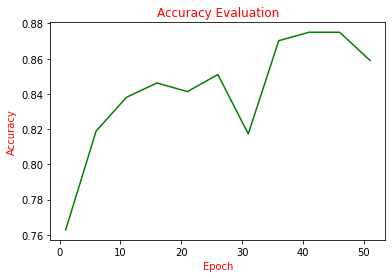

In [ ]:
import matplotlib.pyplot as plt
epochs = []
for i in range(1, 52, 5):
  epochs.append(i)

# Getting the list of accuracies
list_of_accuracies = [0.7628,  0.8189, 0.8381, 0.8462, 0.8413, 0.8510, 0.8173, 0.8702, 0.8750, 0.8750, 0.8590]

# Plotting the accuracies
plt.xlabel("Epoch", color='red')
plt.ylabel("Accuracy", color='red')
plt.title("Accuracy Evaluation", color='red')
plt.plot(epochs, list_of_accuracies, color='green')
plt.show()

### Result (Base Case)
As shown in the above graph, the optimal number of epochs is **45 epochs** for the base case. Let's tune cut the parameters a bit and see the results we end up with.

## (3)(b) Changing the batch size??
In this trial, we will try to change the size of the batches we have used in predicting the presence of pneumonia. Why is this important? Well, there are many factors like the **training time**, **accuracy** and many more that more or less of is crucial for the performance of the model. Therefore let's see how changing the batch size will affect the accuracy of the model. This experiment will be conducted within one epoch because the training of this model is very computationally expensive.

* Initial batch size = 32 [Trial (Δ)]
* Trial (α) Lower batch size
* Trial (β) Higher batch size


---

## Trial Δ (Trainig Time: 11.09 mins)

* Accuracy:- 0.7276


---

## Trial α (batch_size=16, Trainig Time: 14.95 mins)

* Accuracy:- 0.7340


---

## Trial β (batch_size=64, Trainig Time: 12.07 mins)

* Accuracy:- 0.6250


---
Below is a plot for the results within the trials


No handles with labels found to put in legend.


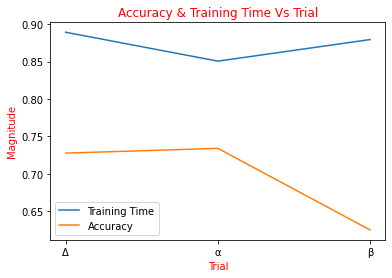

In [ ]:
import matplotlib.pyplot as plt
x_axis = ["Δ", "α", "β"]
y_axis_a = [1-(11.09/100), 1-(14.95/100), 1-(12.07/100)] # Time is converted to % to as less time i.e better, it makes it easier to visualize
y_axis_b = [0.7276, 0.7340, 0.6250]
plt.xlabel("Trial", color='red')
plt.ylabel("Magnitude", color='red')
plt.title("Accuracy & Training Time Vs Trial", color='red')
plt.legend()
plt.plot(x_axis, y_axis_a, label="Training Time")
plt.plot(x_axis, y_axis_b, label="Accuracy")
plt.legend()
plt.show()

### Result (Changing the batch size??)
It is clearly seen in the graph above that trial **Δ** prevailed best as the most accurate and the least time taken for training. You may find the calculation for the **training time** very messy. This is nothing but converting it to a percentage and subtracting it by one to ensure the higher the value for training time the better.

## (3)(c) Adding a Dropout Layer?
As seen on the terminal print displayed above, the accuracy on the **training set** is very high, a staggering **93.67%**. This can be reduced by adding dropout layers within the model. Why must we reduce the accuracy on the training-set?? It is done to prevent **[over-fitting](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb)**. Anyway, let's add a **Dropout layer** for each Convolutional layer-Maxpooling layer pairs and see how this affects the outcome. 
> The current changes will be tested based on the changes already executed on the previous trial experiments.


---

## Trials
* Trial Δ (No Dropout)
* Trial α (0.2 Dropout **Rate**)
* Trial β (0.5 Dropout **Rate**)

> Note: The rate is the percentage of neurons that are disabled. The most optimal rates range from 0.2 - 0.5. 


---


## Trial Δ (No Dropout)
* Accuracy = 
* Training Time = 12.42 mins


---

## Trial α (0.2 Dropout Rate)
* Accuracy = 0.7429
* Training Time = 13.51 mins


---

## Trial β (0.5 Dropout Rate)
* Accuracy = 0.8401
* Training Time = 12.65 mins



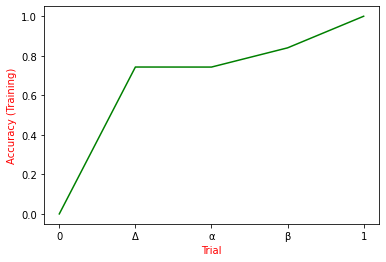

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Trial", color='red')
plt.ylabel("Accuracy (Training)", color='red')
# Getting the values
x = ["0", "Δ", "α", "β", "1"]
y = [0, 0.7431 , 0.7429, 0.8401, 1]
# Plotting
plt.plot(x, y, color='green')

### Result (Adding a Dropout Layer?)
As shown above, the **α** value has the most optimal accuracy. Therefore environment α is used to deduce the final model.

# The Final Training Terminal Print (45 Epochs)


```
runcell(0, '/models/train_model.py')
Using TensorFlow backend.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/45
163/163 [==============================] - 884s 5s/step - loss: 0.5785 - accuracy: 0.7425 - val_loss: 0.6656 - val_accuracy: 0.6250
Epoch 2/45
163/163 [==============================] - 701s 4s/step - loss: 0.5557 - accuracy: 0.7429 - val_loss: 0.6352 - val_accuracy: 0.6250
Epoch 3/45
163/163 [==============================] - 769s 5s/step - loss: 0.4197 - accuracy: 0.8100 - val_loss: 0.6095 - val_accuracy: 0.6827
Epoch 4/45
163/163 [==============================] - 690s 4s/step - loss: 0.3714 - accuracy: 0.8436 - val_loss: 0.5360 - val_accuracy: 0.7516
Epoch 5/45
163/163 [==============================] - 687s 4s/step - loss: 0.3377 - accuracy: 0.8564 - val_loss: 0.5177 - val_accuracy: 0.7500
Epoch 6/45
163/163 [==============================] - 723s 4s/step - loss: 0.3246 - accuracy: 0.8620 - val_loss: 0.4832 - val_accuracy: 0.7676
Epoch 7/45
163/163 [==============================] - 693s 4s/step - loss: 0.2948 - accuracy: 0.8769 - val_loss: 0.5308 - val_accuracy: 0.6923
Epoch 8/45
163/163 [==============================] - 698s 4s/step - loss: 0.2919 - accuracy: 0.8794 - val_loss: 0.6195 - val_accuracy: 0.6314
Epoch 9/45
163/163 [==============================] - 689s 4s/step - loss: 0.2816 - accuracy: 0.8817 - val_loss: 0.4899 - val_accuracy: 0.7500
Epoch 10/45
163/163 [==============================] - 736s 5s/step - loss: 0.2736 - accuracy: 0.8905 - val_loss: 0.6952 - val_accuracy: 0.6314
Epoch 11/45
163/163 [==============================] - 690s 4s/step - loss: 0.2631 - accuracy: 0.8917 - val_loss: 0.6500 - val_accuracy: 0.6362
Epoch 12/45
163/163 [==============================] - 681s 4s/step - loss: 0.2542 - accuracy: 0.8999 - val_loss: 0.6454 - val_accuracy: 0.6346
Epoch 13/45
163/163 [==============================] - 760s 5s/step - loss: 0.2332 - accuracy: 0.9032 - val_loss: 0.8120 - val_accuracy: 0.6298
Epoch 14/45
163/163 [==============================] - 667s 4s/step - loss: 0.2328 - accuracy: 0.9061 - val_loss: 0.5982 - val_accuracy: 0.7115
Epoch 15/45
163/163 [==============================] - 749s 5s/step - loss: 0.2246 - accuracy: 0.9132 - val_loss: 0.5941 - val_accuracy: 0.6843
Epoch 16/45
163/163 [==============================] - 664s 4s/step - loss: 0.2167 - accuracy: 0.9156 - val_loss: 0.7654 - val_accuracy: 0.6458
Epoch 17/45
163/163 [==============================] - 675s 4s/step - loss: 0.2035 - accuracy: 0.9201 - val_loss: 0.8726 - val_accuracy: 0.6330
Epoch 18/45
163/163 [==============================] - 702s 4s/step - loss: 0.2163 - accuracy: 0.9172 - val_loss: 1.3209 - val_accuracy: 0.6250
Epoch 19/45
163/163 [==============================] - 668s 4s/step - loss: 0.2068 - accuracy: 0.9195 - val_loss: 0.7866 - val_accuracy: 0.6554
Epoch 20/45
163/163 [==============================] - 666s 4s/step - loss: 0.1972 - accuracy: 0.9248 - val_loss: 1.0525 - val_accuracy: 0.6314
Epoch 21/45
163/163 [==============================] - 662s 4s/step - loss: 0.2050 - accuracy: 0.9222 - val_loss: 0.6684 - val_accuracy: 0.6458
Epoch 22/45
163/163 [==============================] - 664s 4s/step - loss: 0.2002 - accuracy: 0.9216 - val_loss: 0.7148 - val_accuracy: 0.6587
Epoch 23/45
163/163 [==============================] - 668s 4s/step - loss: 0.2014 - accuracy: 0.9235 - val_loss: 0.6059 - val_accuracy: 0.7516
Epoch 24/45
163/163 [==============================] - 663s 4s/step - loss: 0.2055 - accuracy: 0.9225 - val_loss: 0.9331 - val_accuracy: 0.6362
Epoch 25/45
163/163 [==============================] - 661s 4s/step - loss: 0.1935 - accuracy: 0.9258 - val_loss: 0.6708 - val_accuracy: 0.6731
Epoch 26/45
163/163 [==============================] - 667s 4s/step - loss: 0.1921 - accuracy: 0.9248 - val_loss: 0.7585 - val_accuracy: 0.6410
Epoch 27/45
163/163 [==============================] - 662s 4s/step - loss: 0.1947 - accuracy: 0.9258 - val_loss: 0.8276 - val_accuracy: 0.6506
Epoch 28/45
163/163 [==============================] - 664s 4s/step - loss: 0.1829 - accuracy: 0.9298 - val_loss: 0.7084 - val_accuracy: 0.6538
Epoch 29/45
163/163 [==============================] - 662s 4s/step - loss: 0.2049 - accuracy: 0.9201 - val_loss: 0.6149 - val_accuracy: 0.6987
Epoch 30/45
163/163 [==============================] - 662s 4s/step - loss: 0.1829 - accuracy: 0.9310 - val_loss: 0.8617 - val_accuracy: 0.6378
Epoch 31/45
163/163 [==============================] - 667s 4s/step - loss: 0.1815 - accuracy: 0.9296 - val_loss: 0.9088 - val_accuracy: 0.6346
Epoch 32/45
163/163 [==============================] - 661s 4s/step - loss: 0.1895 - accuracy: 0.9258 - val_loss: 1.4713 - val_accuracy: 0.6250
Epoch 33/45
163/163 [==============================] - 661s 4s/step - loss: 0.1883 - accuracy: 0.9264 - val_loss: 0.9519 - val_accuracy: 0.6362
Epoch 34/45
163/163 [==============================] - 664s 4s/step - loss: 0.1804 - accuracy: 0.9327 - val_loss: 1.0690 - val_accuracy: 0.6362
Epoch 35/45
163/163 [==============================] - 663s 4s/step - loss: 0.1871 - accuracy: 0.9298 - val_loss: 1.0598 - val_accuracy: 0.6314
Epoch 36/45
163/163 [==============================] - 679s 4s/step - loss: 0.1827 - accuracy: 0.9293 - val_loss: 1.4943 - val_accuracy: 0.6250
Epoch 37/45
163/163 [==============================] - 666s 4s/step - loss: 0.1848 - accuracy: 0.9275 - val_loss: 0.8499 - val_accuracy: 0.6587
Epoch 38/45
163/163 [==============================] - 661s 4s/step - loss: 0.1845 - accuracy: 0.9294 - val_loss: 0.9901 - val_accuracy: 0.6298
Epoch 39/45
163/163 [==============================] - 663s 4s/step - loss: 0.1837 - accuracy: 0.9237 - val_loss: 0.7938 - val_accuracy: 0.6891
Epoch 40/45
163/163 [==============================] - 665s 4s/step - loss: 0.1725 - accuracy: 0.9314 - val_loss: 0.9436 - val_accuracy: 0.6571
Epoch 41/45
163/163 [==============================] - 662s 4s/step - loss: 0.1701 - accuracy: 0.9362 - val_loss: 0.9216 - val_accuracy: 0.7083
Epoch 42/45
163/163 [==============================] - 661s 4s/step - loss: 0.1756 - accuracy: 0.9323 - val_loss: 0.9254 - val_accuracy: 0.6859
Epoch 43/45
163/163 [==============================] - 660s 4s/step - loss: 0.1745 - accuracy: 0.9369 - val_loss: 0.7829 - val_accuracy: 0.6971
Epoch 44/45
163/163 [==============================] - 660s 4s/step - loss: 0.1837 - accuracy: 0.9296 - val_loss: 1.0627 - val_accuracy: 0.6298
Epoch 45/45
163/163 [==============================] - 664s 4s/step - loss: 0.1781 - accuracy: 0.9360 - val_loss: 1.2003 - val_accuracy: 0.6266
Training took 513.0766913334529 mins
Model Saved
```



# (4) How To Use The App
Before the coded Graphical User Interface (GUI) is shown, a **file explorer dialogue** comes up prompting you to choose the file you need to be tested. The file must be in a **gif** format. After the file is selected your demo file is shown on the X-ray console. Simply hit scan to know your results. An image of the **Dashboard** is shown below.

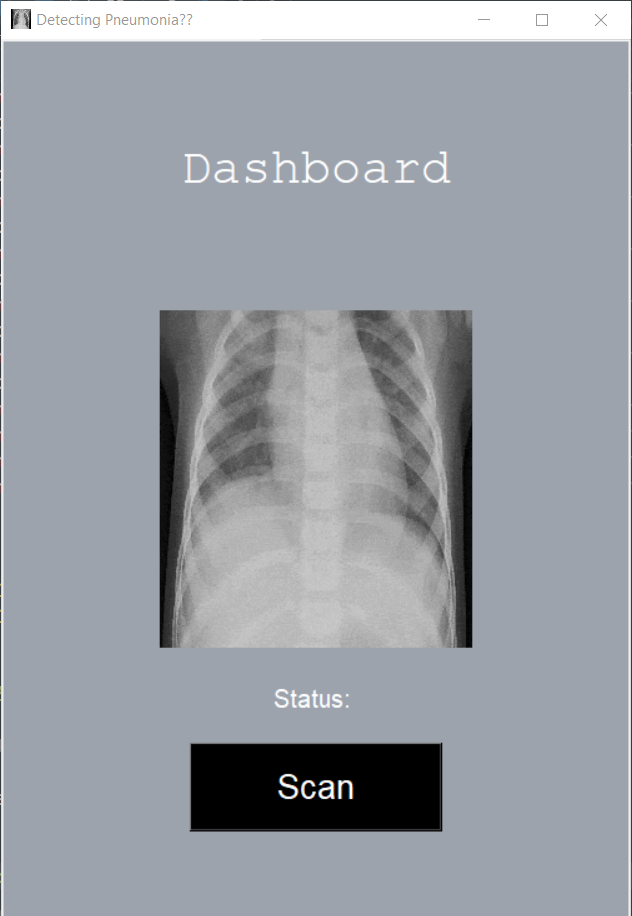

After the scan button is pressed it takes the image, uses the **weights.h5** file weights (available in the commercial version [here](https://codemasterady.wixsite.com/website)) and uses those weights to predict if the lungs shown has or doesn't have pneumonia.